# Multi-cúbits




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $


- [Bases multi-cúbit](#multicubit)


- [Entrelazamiento](#entrelazamiento)
    - [Base de Bell](#base_bell)


- [Circuitos multi-cúbit](#circuitos)



- [Puertas multi-cúbits](#multioper)


- [Teorema de no-clonación](#nocloning)

In [3]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

(sec_bases_multi_cubit)=
## Bases multi-cúbit

 Sea $\{ \ket{i}\}_{i=0,1}$ la base computacional del espacio de Hilbert de un cúbit $\Hil = {\mathbb C}^2$.
 
<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición: </b> 
<br>
La base computacional de $ \Hil^{\otimes n}$ está formada por todas las cadenas de elementos posibles
<br>
<br>
$$
 \ket{i_{n-1}}\otimes \ket{i_{n-2}}\otimes ... \otimes \ket{i_0} ~\equiv ~\ket{i_{n-1} i_{n-2}...i_0}~$$ 
<br>
<br>    
donde $~~
 i_{n-1},...,i_0=0,1$
</div>

<br>



La *dimensión*  dim($\Hil^{\otimes n}$) = $2^n$ coincide con el número combinaciones distintas posibles: $2\times 2...\times 2 = 2^n$.



- Cuando pasamos a vectores columnas para representar un ket, el producto tensorial se traduce en el producto de Kronecker. Por ejemplo, para un sistema de 2-cúbits,   $n=2$ y tendríamos $2^n=2^2 = 4$ y entonces

<br>

$$
\ket{00}~=~ \ket{0}\otimes \ket{0}~=~
\begin{bmatrix}1\\ 0\end{bmatrix} \otimes \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}
~~~~~~,~~~~~
\ket{01}~=~ \ket{0}\otimes \ket{1}~=~
\begin{bmatrix}1\\ 0\end{bmatrix} \otimes \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix}
$$


<br>

$$
\ket{10}~=~ \ket{1}\otimes \ket{0}~=~
 \begin{bmatrix}0\\ 1\end{bmatrix} \otimes \begin{bmatrix}1\\ 0\end{bmatrix} = \begin{bmatrix}0\\0\\1 \\ 0\end{bmatrix}
 ~~~~~,~~~~
\ket{11}~=~ \ket{1}\otimes \ket{1}~=~
\begin{bmatrix}0\\ 1\end{bmatrix} \otimes \begin{bmatrix}0\\ 1\end{bmatrix} = \begin{bmatrix}0\\0\\0 \\ 1\end{bmatrix}
$$

<br>


Las etiquetas de los vectores y, por tanto, de las componentes de las matrices, bi-índices $ij=11,12,21,22$ que adopta el mismo número, $N^2$, de cofiguraciones distintas. 


<div class="alert alert-block alert-danger">
<b> Notar: </b>
    
El <i>multi-ínidice</i> $i_{n-1}i_{n-2}....i_0$ puede interpretarse como un número entero, $p$, escrito en base *binaria*
<br>

$$
~~ i_{n-1} i_{n-2}...i_0 ~~\longleftrightarrow ~~~p = \sum_{k=0}^{n-1} 2^k i_k 
$$
<br>
que tomará  $2^n$ valores $p = 0,1, \, ...\, ,2^{n}-1$. 
<br>
<br>    
El cambio de notación *multi-índice* $\leftrightarrow$ *entero en notación decimal* será frecuente y se aplicará a cualquier elemento. 
    
Por ejemplo $\ket{000} = \ket{0}, \ket{111} = \ket{7}$ etc.
</div>

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<br>    
El vector de estado más general  $\ket{u}\in \Hil^{\otimes n}$ será una combinación lineal de elementos de la base computacional $\ket{i_n i_{n-1}...i_1}$ en términos de unas componentes $u_{i_ni_{n-1}...i_1}$
<br>    
<br>
$$
\ket{u} = \sum_{i_{n-1},...,i_0=0,1} u_{i_{n-1} ... i_0} \ket{i_{n-1}  ... i_0}  = \sum_{p=0}^{2^n-1} u_p \ket{p}, .
$$
<br>
donde hemos usado alternativamente la notación binaria y la decimal. 
</div>





<div class="alert alert-block alert-warning">
<b>Ejemplo:</b>para $n=2$ tendremos, en notación binaria  

\begin{array}{ccc}
\ket{u} ~&=& ~ \sum_{i,j=0,1} u_{ij} \ket{ij}~=~ u_{00}\ket{00}+ u_{01}\ket{01} + u_{10}\ket{10} +u_{11}\ket{11}
\\ \\
~&=&~ u_{00}\begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}+ u_{01}  \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix} + u_{10}\begin{bmatrix}0\\0\\1\\0\end{bmatrix}+u_{11}  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}   ~ = \begin{bmatrix}u_{00}\\ u_{01}\\ u_{10} \\ u_{11}  \end{bmatrix}
\end{array}

y en notación decimal, para el mismo vector
\begin{array}{ccc}
\ket{u} ~&=& ~ \sum_{k=0}^{2^2-1=3} u_{k} \ket{k}~=~ u_{0}\ket{0}+ u_{1}\ket{1} + u_{2}\ket{2} +u_{3}\ket{3}
\\ \\
~&=&~ u_{0}\begin{bmatrix}1\\0\\0 \\ 0\end{bmatrix}+ u_{1}  \begin{bmatrix}0\\1\\0 \\ 0\end{bmatrix} + u_{2}\begin{bmatrix}0\\0\\1\\0\end{bmatrix}+u_{3}  \begin{bmatrix}0\\0\\0\\1\end{bmatrix}   ~ = \begin{bmatrix}u_{0}\\ u_{1}\\ u_{2} \\ u_{3}  \end{bmatrix}
\end{array}

No debería haber confusión entre ambas notaciones puesto que, en cuanto aparezca un número superior a 1 quiere decir que estamos tratando con la base decimal. 
</div>



  
<div class="alert alert-block alert-success">
    <b>Ejercicio 1.2.1.2</b> 
Normaliza el vector $\ket{u} = (1+i)\ket{101} -2\ket{010} + 3\ket{111}$ y escríbelo en notación decimal
</div>

### Circuitos multi-cúbit

Sea $\ket{q_{n-1}q_{n-2}...q_0}$ un estado multicúbit de la base computacional $q_{a} = 0,1$. 

Este estado 
se propaga a lo largo de un circuito de forma que <i>cada línea representa un espacio de Hilbert</i>. 

La asignación que se hace en *qiskit* coloca el cúbit *menos relevante* $q_0$  en la  línea superior. Esto es

- Qiskit:  

<div>    
<img src="images/Multicubit_circ.png" width="30%" style="margin:auto"/>
</div>
<br>




Esta ordenación en un circuito es la inversa de la que tradicional

- Todos los demás

<div>
<img src="images/Multicubit_circ_NC.png" width="30%" style="margin:auto"/>
</div>
<br>

(sec_multiqubit_entrelazamiento)=
### Entrelazamiento


De forma  general, los estados $\ket{u}\in \Hil^{\otimes n}$ pertenecen a dos conjuntos disjuntos
    <br>
    
   - estado factorizables, cuando $\ket{u} = \ket{a}\otimes \ket{b}\otimes...\otimes \ket{c}$
<br>

   - estados entrelazados, cuando $\ket{u} \neq \ket{a}\otimes \ket{b}\otimes...\otimes \ket{c}$ no es factorizable
    
  

Ahora podemos usar también bases cuyo elementos sean vectores factorizados o entrelazados. 

- **base computacional** (factorizada): $\{ \ket{00},\ket{01},\ket{10},\ket{11}\}$
<br>

- **base de Bell** (entrelazada): 

\begin{array}{rcl}
\ket{B_{00}} &=& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) \\
\ket{B_{01}} &=& \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) \\
\ket{B_{10}} &=& \frac{1}{\sqrt{2}} \big( \ket{01} + \ket{10} \big) \\
\ket{B_{11}} &=& \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{10} \big) \\
\end{array}

<br>

### Medidas parciales

Una medida parcial afecta sólamente a un subconjunto de cúbits de un multi-cúbit. 

Aquí encontramos una diferencia crucial entre estados factorizables y entrelazados. 

Consideremos el estado bi-cúbit *factorizable* visto antes

$$
\ket{u} = \ket{a}\otimes \ket{b} = \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\, .
$$

donde vamos a suponer que el cúbit $\ket{a}$ está en el laboratorio de Alice, y el $\ket{b}$ en el de Bob.

Una medida de Alice sobre el primer cúbit solo podrá resultar, con probabilidad $1/2$, en uno de los dos posibles estados siguientes  
><br>
>$$
\ket{u} ~\rightarrow ~ \left\{ \begin{matrix}\ket{0} \otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big)\\ \ket{1} \otimes \frac{1}{\sqrt{2}}\big( \ket{0} + \ket{1}\big) \end{matrix} \right.
$$
<br>

Vemos que, después de esta medición, el segundo cúbit permanece intacto. Si Bob mide, podrá obtener $\ket{0}$ ó $\ket{1}$ con probabilidad $1/2$.
<br>

-  en este caso, las medidas de Alice y Bob *no están correlacionadas* 


 Sin embargo, si el estado es *entrelazado*, por ejemplo, 
<br>

$$
  \ket{u} = \frac{1}{\sqrt{2}}\big( \ket{00} + \ket{11} \big)\, ,
$$
<br>
una medida de Alice sobre el primer cúbit hace colapsar estado completo a uno de los dos siguientes posibles 
<br>
<br>
$$
\ket{u} ~\stackrel{\hbox{ mide Alice}}{\longrightarrow} ~ \left\{ \begin{matrix}\ket{0}\otimes\ket{0}  \\ \ket{1}\otimes \ket{1}\end{matrix} \right. \, .
$$
<br>
también con probabilidad 1/2 cada caso.



Vemos que ahora: el segundo cúbit ha sufrido modificación  *correlacionada* con el resultado obtenido de la medida del primero

>Si Alice midió $\ket{0}$, Bob sólo puede obtener $\ket{0}$
><br>
><br>
>Si Alice midió $\ket{1}$, Bob sólo puede obtener $\ket{1}$
<br>


-  en este caso, las medidas de Alice y Bob sí están 100\% *correlacionadas*


Esta correlación es independiente de la distancia que separe a Alice y a Bob. Eso parece violar causalidad. 


Einstein Podolski y Rosen en 1935 pensaron que este hecho demostraba que la Mecánica Cuántica era incompleta.  Esto se conoce como la [*paradoja EPR*](https://en.wikipedia.org/wiki/Einstein%E2%80%93Podolsky%E2%80%93Rosen_paradox)

<div class="alert alert-block alert-danger">
<b> Observar: </b>
<br>    
    
-  En ambos casos, factorizable o entrelazado,  las probabilidades de Bob, de obtener $\ket{0}$ ó $\ket{1}$ en el segundo cúbit, son iguales a $1/2$. 
<br>
    
- Eso implica que las correlaciones cuánticas no permiten transmitir información   <i>(No-signalling theorem)</i>.
<br>
    
- Sin embargo, sus efectos sí que existen. Para ponerlos de manifiesto es necesario diseñar experimentos más sutiles. El primero que se inventó fue debido a John Bell en 1964

</div>

## Puertas multi-cúbit

### La puerta de Walsh-Hadamard

El operador de Waslh-Hadamard es un *producto tensorial de operadores*
<br>
<br>
$$
W =  H^{\otimes n} = H\otimes H \ldots \otimes H 
$$




La  acción  de $W$ sobre el estado de referencia $\ket{00...0}$ produce una superposición uniforme de todos los estados de la base.
<br>
<br>

\begin{eqnarray}
W \ket{00...0} &~=~& H\ket{0}\otimes H\ket{0} \otimes ... \otimes H\ket{0} \\  \rule{0mm}{12mm}
&=& \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\otimes ...\otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)\\ \rule{0mm}{10mm}
&=& \frac{1}{2^{n/2}}\big(\ket{00...00} + \ket{00...01}+....+\ket{11...11} \big)
\end{eqnarray}
 

La acción de $W$ sobre un estado multicúbit  es necesario recordar la acción de $H$ 

$$
H\ket{x} = \sum_{y=0,1}(-1)^{xy}\ket{y}
$$

Entonces, operando

\begin{eqnarray}
W \ket{x} &=& H\ket{x_{n-1}}\otimes H\ket{x_{n-2}}\otimes \ldots \otimes H\ket{x_0} \\  \rule{0mm}{12mm}
\rule{0mm}{10mm}
&=& \sum_{y_{n-1}= \, 0,1} (-1)^{y_{n-1}x_{n-1}}\ket{y_{n-1}}\otimes \sum_{y_{n-2}=0,1} (-1)^{y_{n-2}x_{n-2}}\ket{y_{n-2}} \otimes \ldots \otimes  \sum_{y_{0}\, =\, 0,1} (-1)^{y_{0}x_{0}}\ket{y_{0}} 
\end{eqnarray}

\begin{eqnarray}
&=& \sum_{y_{n-1} y_{n-2}\ldots y_{0}=\, 0,1} (-1)^{x_{n-1} y_{n-1}+ \ldots + x_0 y_0} \ket{y_{n-1}\ldots y_0} \hspace{5.2cm}\\
&=& \sum_{y \, =\, 0}^{2^n-1}(-1)^{x\cdot y} \ket{y} \rule{0mm}{10mm}
\end{eqnarray}

donde $$ x\cdot y = x_{n-1} y_{n-1} + x_{n-1} y_{n-1} + \ldots + x_0 y_0$$

### La puerta SWAP

 La puerta SWAP es una puerta binaria fundamental, cuya acción consiste en permutar los estados existentes en los registros individuales sobre los que actúa. En particular, sobre los elementos de la base


$$
U_{\rm SWAP }: \ket{00}\to\ket{00}~~,~~\ket{01}\to\ket{10}~~,~~\ket{10}\to\ket{01}~~,~~
\ket{11}\to\ket{11}\, .
$$


Esto nos permite escribir el operador en la notación de producto exterior

$$
U_{\rm SWAP } = \ket{00}\bra{00} + \ket{01}\bra{10} + \ket{10}\bra{01} +\ket{11}\bra{11} 
$$


con matriz asociada 
$$
U_{\rm SWAP} =  \begin{bmatrix} 
1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1
\end{bmatrix}
$$

y su inserción en un circuito se representa en la forma siguiente
<br>
<br>
<div>
<img src="images/SWAP_gate.png" width="25%" style="margin:auto"/>
</div>
<br>

### Puertas controladas $\cg{U}$

Las puertas controladas son eficientes para generar entrelazamiento

En la puerta controlada un operador se aplica sobre un cúbit dependiendo del estado en el que se encuentra otro. 

Este segundo cúbit se denomina *controlador*, mientras que el primero es el *controlado*



La puerta controlada se representa como sigue
<br>
<br>

$$
\cg{U} = \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes U
$$
<br>

donde $U$ es un operador unitario de 1-cúbit general. 


Si en el primer cúbit (controlador)
<br>
    
- entra $\ket{0}$, sale $\ket{0}$ y en el segundo cúbit (controlado) no se hace nada (se aplica $I$).
<br>
    
- entra $\ket{1}$, sale $\ket{1}$ y en el segundo cúbit (controlado) se aplica el operador $U$.



La *representación matricial* de $\cg{U}$ es fácil de obtener como suma de  *productos de Kronecker* 


\begin{eqnarray}
\cg{U} &=& \begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}\otimes  I +  \begin{bmatrix}0 & 0 \\ 0 & 1 \end{bmatrix} \otimes U
= \begin{bmatrix} 1\times I & 0 \\ 0 & 0 \end{bmatrix}  + 
\begin{bmatrix} 0 & 0 \\ 0 & 1\times U \end{bmatrix} \\
&=& \begin{bmatrix}   I & 0 \\ 0 &   U \end{bmatrix} = 
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & U_{11} & U_{12} \\
0 & 0 & U_{21} & U_{22}\end{bmatrix}
\end{eqnarray}



<div class="alert alert-block alert-danger">

- Escrito de esta manera es evidente que, si $U$ es una matriz unitaria, $\cg{U}$ también lo es $~
\Rightarrow (\cg{U})^\dagger \cg{U} = I$


- Esto no es algo trivial por cuanto la combinación lineal de operadores unitarios, en general, no es  unitaria.
</div>

- La *acción* de $\cg{U}$ sobre elementos de la base $\{\ket{x}\}$ donde $x=0,1$ admite una forma compacta 
<br>
<br>
$$
\cg{U}:\ket{x}\otimes\ket{y} = \ket{x} \otimes U^x\ket{y}
$$
<br>


- La *representación gráfica* del circuito asociado al operador controlado $\cg{U}$ es la siguiente
<br>
<br>
<br>

<div>
<img src="images/cu_gate.png" width="20%" style="margin:auto"/>
</div>
<br>
con $x,y = 0,1$.


<div class="alert alert-block alert-success">
    <b>Ejercicio </b>  
    
escribe un operador controlado y las matrices asociadas cuando  

-  el cúbit de control es el segundo sobre el primero. 
<br>
-  el operador $U$ se aplica sobre el segundo cúbit, si el estado del primero es $\ket{0}$. 

</div>
    


Operadores como éste existen en circuitos clásicos. La fascinante novedad es que, ahora, por el primer cúbit podría circular una *superposición* $a\ket{0} + b\ket{1}$.

En ese caso, el resultado de una acción controlada también conduce a una superposición, de forma tal que **se genera entrelazamiento**


    
Para verlo, hagamos actuar $\cg{U}$ sobre un estado de la forma  $\ket{\phi} = (a\ket{0} + b\ket{1})\otimes \ket{U}$, que es *factorizable*
  
<br>
 
\begin{eqnarray}
\cg{U}\,(a\ket{0} +b \ket{1})\otimes \ket{v} &=&
    \left(\ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes U\rule{0mm}{4mm}\right)(a\ket{0} +b \ket{1})\otimes \ket{v}  
  \\ \rule{0mm}{14mm}
    &=& a\ket{0}\otimes \ket{v} + b\ket{1}\otimes U\ket{v} \nonumber
\end{eqnarray}


Vemos que, efectivamente, el resultado es un estado *entrelazado*. 
<br>
<br>
<br>
<div>
<img src="images/entangling_CU_circuit.png" width="40%" style="margin:auto"/>
</div>
<br>



### La puerta CNOT

La  puerta *binaria* CNOT = $\cg{X}$ es el caso más sencillo de *operador no factorizable* 
<br>
<br>

$$
\hbox{CNOT} = \cg{X} ~=~ \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes X ~=~ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0\end{bmatrix}
$$

- Sobre elementos de la base computacional $\ket{xy}=\ket{x}\otimes\ket{y}$ donde $\, x,y= 0,1$, su acción  se puede representar de manera compacta usando la suma módulo dos 

$$
\cg{X}:\ket{x}\otimes\ket{y}=  \ket{x} \otimes X^x\ket{y} = \ket{x} \otimes \ket{y\oplus x}
$$

$\rule{0.5cm}{0mm}$ gráficamente


<div>
<img src="images/cX_gate.png" width="30%" style="margin:auto"/>
</div>

<br>
<div class="alert alert-block alert-success">
<b> Ejercicio 1.2.1.4 </b>
    
el estado factorizable más general de dos cúbits es ($a$ es la normalización)

$$
\ket{\psi} = a \left(\ket{0} + b_1 e^{i\phi_1}\ket{1}) (\ket{0} + b_0 e^{i\phi_0} \ket{1} \right) 
$$
<br>

Escribe la condición más general que deben satisfacer  $b_0,b_1,\phi_0$ y $\phi_1$ para que CNOT$\ket{\psi}$ sea un vector entrelazado.
</div>

La puerta CNOT en qiskit aparece invertida con respecto a la que dibujamos más arriba. Ello se debe a que qiskit ordena los qubits en $\ket{q_1 \, q_0}$ poniendo el asociado al bit más relevante, $q_1$, abajo. 


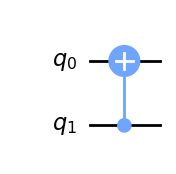

In [5]:
from qiskit import Aer, QuantumCircuit, execute
qc = QuantumCircuit(2)
qc.cx(1,0)
qc.draw(output='mpl')

ahora podemos pedir el operador unitario que reproduce el circuito anterior


In [5]:
from qiskit import Aer, execute
U_simulator = Aer.get_backend('unitary_simulator')

job = execute(qc, backend = U_simulator)
CNOT_matrix = job.result().get_unitary()

#print(U_matrix)
from qiskit.tools.visualization import array_to_latex
array_to_latex(CNOT_matrix, prefix="\\text{CNOT = }\n")

<IPython.core.display.Latex object>

### La puerta CSWAP o de Fredkin

Si el cúbit  de control está en  el estado $\ket{1}$ los dos controlados se intercambian
<br>
<br>
$$
U_{\rm CSWAP} =\ket{0}\bra{0} \otimes I_4 + \ket{1}\bra{1} \otimes U_{\rm SWAP} \, .
$$


<br>
<br>
<div>
<img src="images/CSWAP_gate.png" width="15%" style="margin:auto"/>
</div>
<br>


### La puerta CCNOT o de Toffoli

La puerta CCNOT, también llamada puerta de Toffoli,  es un operador sobre $\Hil^{\otimes 3}$, en el que dos cúbits controlan la acción de $X$ sobre un tercero

$\Rightarrow$
*sólo si ambos cúbits* de control están en el estado $\ket{11}$ el operador $X$ actuará sobre el tercero
<br>
<br>
<br>
<div>
<img src="images/ccX_gate.png" width="20%" style="margin:auto"/>
</div>
<br>


De nuevo, su representación es muy sencilla

$$
{\rm CCNOT} = \big(\ket{00}\bra{00}+\ket{01}\bra{01}+\ket{10}\bra{10}\big)\otimes I + \ket{11}\bra{11}\otimes X
$$



<div class="alert alert-block alert-success">
<b> Ejercicios 1.2.1.5 </b> 
<br>    
<br>    
1. obtener la matriz que representa la puerta de Toffoli en la base computacional. Reproducirla usando <i>qiskit</i>.
    <br><br> 
2. obtener la matriz de un circuito de 3 cúbits con una puerta CNOT en la que el tercer cúbit controla el primero. Reproducirla usando qiskit.
</table>

### Puertas multiplemente controladas

En la puerta CNOT o CX multi-controlada el operador X se activa si y sólo si los cúbits de control se encuentran en una configuración deseada. 
 
 Los botones blancos denotan controladores que se activan si el cúbit es $\ket{0}$. Esencialmente son iguales a un controlador negro con una puerta $X$ antes y otra después.


Por ejemplo, en este caso, la puerta $X$ se activará si los cúbits de control se encuentran en el estado $\ket{1100}$

<br>
<br>
<br>
<div>
<img src="images/MCX_gate.png" width="8%" style="margin:auto"/>
</div>
<br>


El operador asociado a esta puerta será

$$
MCX = \ket{1100}  \bra{1100}\otimes X + (I-\ket{1100}\bra{1100}) \otimes I
$$

<div class="alert alert-block alert-warning">

En *qiskit* existe la posibilidad de controlar una puerta arbitraria (de la clase <i>Gate</i>) añadiéndole el método <i>control</i> que acepta dos parámetros:

- el primero es el número de cúbits que van a actuar como control.
    

-  el segundo, <i>ctrl_state</i> es un número decimal especifica el estado de control para el cual se activa la puerta. En el caso de la figura sería el número 12


- Puede encontrarse información sobre las puertas controladas en qiskit en los siguiente enlaces:
https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html#qiskit.circuit.ControlledGate
https://qiskit.org/documentation/apidoc/circuit_library.html
    
    
</div>

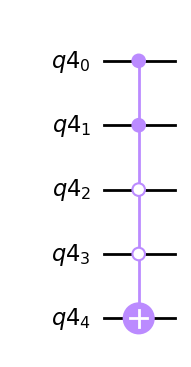

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import SwapGate, XGate

qr = QuantumRegister(5)

qc = QuantumCircuit(qr)

gateMCX = XGate().control(4,ctrl_state= 3) # puerta X 4-veces controlada
gateMCSWAP = SwapGate().control(3,ctrl_state= 4) # puerta SWAP 3 veces controlada


qc.append(gateMCX,[0,1,2,3,4])    
#qc.append(gateMCSWAP,[0,1,2,3,4])    


qc.draw('mpl')

En el convenio de qiskit, efectivamente, este operador es el que se corresponde con 

$$
MCX = X\otimes \ket{0011}  \bra{0011} + X\otimes (I-\ket{0011}\bra{0011})
$$

<div class="alert alert-block alert-success">
<b> Ejercicio: </b>
inserta la puerta MCX de forma que se genere exactamente el circuito dibujado en la figura.
</div>

### Circuito entrelazador para la Base de Bell


El circuito que *prepara* la <i>base de Bell</i> $~\{\ket{B_{xy}} \equiv \ket{xy}_B \}~$ a partir de la <i>base computacional</i>  $\{\ket{xy}\}$ 
<br>
<br>

<div>
<img src="images/Bell_basis.png" width="30%" style="margin:auto"/>
</div>

<br>
Concretamente 
<br>

\begin{array}{rcl}
\ket{00} ~~~\stackrel{I\otimes H}{\longrightarrow}~~~ \frac{1}{\sqrt{2}}\ket{0}(\ket{0}+\ket{1})  &~~~\stackrel{\rm CNOT(0,1)}{\longrightarrow}& \frac{1}{\sqrt{2}} \big( \ket{00} + \ket{11} \big) ~~=~~ \ket{00}_B \\
\ket{01} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{0}(\ket{0} - \ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{00} - \ket{11} \big) ~~=~~ \ket{01}_B \\
\ket{10} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{1}(\ket{0}+\ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{10} + \ket{01} \big) ~~=~~ \ket{10}_B \\
\ket{11} ~~~\longrightarrow~~~ \frac{1}{\sqrt{2}}\ket{1}(\ket{0}-\ket{1})  &~~~\longrightarrow & \frac{1}{\sqrt{2}} \big( \ket{01} - \ket{01} \big) ~~=~~ \ket{11}_B 
\end{array}


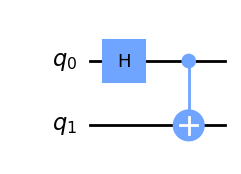

<IPython.core.display.Latex object>

In [13]:
from qiskit import Aer, QuantumCircuit, execute
' create the circuit '
qc = QuantumCircuit(2,0)    
#qc.x(0)
#qc.x(1)

qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))


' execute in mode statevector_simulator '
S_simulator = Aer.get_backend('statevector_simulator')
Bell_state = execute(qc,S_simulator).result().get_statevector(decimals=5)


from qiskit.quantum_info import Statevector
Statevector(Bell_state).draw('latex')

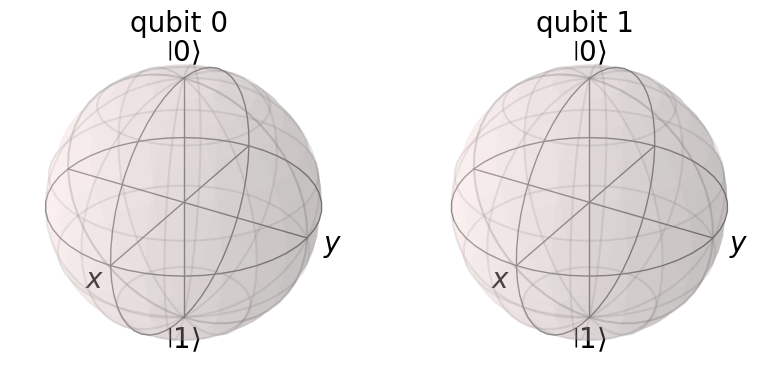

In [7]:
' the Bell state cannot be drawn on Bloch spheres'
Statevector(Bell_state).draw('Bloch')

## Teorema de no-clonación

El *Teorema de No Clonación* es uno de los resultados más sencillos y a la vez más importantes del formalismo de la Mecánica Cuántica. 

De hecho su formalización completa es bastante reciente, 1982, debida a [Wootters, Zurek](https://en.wikipedia.org/wiki/No-cloning_theorem#cite_note-wootterszurek-2) and [Dieks](https://en.wikipedia.org/wiki/No-cloning_theorem#cite_note-dieks-3). 

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Teorema</b>: <i> (de  no-clonación)</i> 
<br>    
<br>    
no existe un operador unitario $U$  que, para un estado arbitrario $|\psi\rangle$, realice la siguiente operación
<br>  
<br>    
$$
U ( \ket{\psi}\otimes \ket{0}) = \ket{\psi}\otimes \ket{\psi}
$$
</div>



*Demostración:*

Supondremos que $U$ existe y llegaremos a una contradicción. 
Tratemos de clonar el estado $\alpha\ket{\psi}+\beta\ket{\phi}$. Esto implica evaluar
<br>
<br>

$$
U (\alpha\ket{\psi}+\beta\ket{\phi})\otimes \ket{0} = 
(\alpha\ket{\psi}+\beta\ket{\phi})\otimes (\alpha\ket{\psi}+\beta\ket{\phi})
$$
<br>


Sin embargo, la linealidad de $U$ nos permite seguir otro camino
<br>
<br>

\begin{eqnarray}
U(\alpha|\psi\rangle+\beta|\phi\rangle) \otimes|0\rangle &=& \alpha U|\psi\rangle \otimes|0\rangle+\beta U|\phi\rangle \otimes|0\rangle  \\ \rule{0mm}{12mm}
&=&\alpha|\psi\rangle \otimes|\psi\rangle+\beta|\phi\rangle \otimes|\phi\rangle . \rule{0mm}{6mm}
\end{eqnarray}
<br>

Los dos resultados son diferentes y el teorema queda demostrado por reducción al absurdo.

<br>
<div class="alert alert-block alert-danger">
<b> Notar: </b>    
<br>  

- El teorema de no clonación pone  de manifiesto la <i> tensión </i> que hay entre $linealidad$ y $tensorialidad$, dos propiedades fundamentales de la Mecánica Cuántica.
<br>

- Es muy importante recalcar que la validez de este teorema sólo aplica a estados <i> genéricos </i>. 

- Si por ejemplo nos restringimos a estados de la base $\ket{0}$ y $\ket{1}$, entonces la mera puerta CNOT actúa como lo haría un operador de clonación.
    
$$
\cg{X}\ket{00}\to \ket{00}~~~~~,~~~~~~ \cg{X}\ket{10}\to \ket{11}
$$
</div>
<br>
<br>